In [43]:
import matplotlib.pyplot as plt
import numpy as np
import os    
import math
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

# <span style="color:blue">  Esercizio 6.1 - Metropolis and Gibbs</span>


In [46]:
cv_metropolis=np.loadtxt(r"NSL_SIMULATOR\OUTPUT\spin_data_metropolis.txt", usecols=0, skiprows=1)
cv_err_metropolis=np.loadtxt(r"NSL_SIMULATOR\OUTPUT\spin_data_metropolis.txt", usecols=1, skiprows=1)
U_metropolis=np.loadtxt(r"NSL_SIMULATOR\OUTPUT\spin_data_metropolis.txt", usecols=2, skiprows=1)
U_err_metropolis=np.loadtxt(r"NSL_SIMULATOR\OUTPUT\spin_data_metropolis.txt", usecols=3, skiprows=1)
chi_metropolis=np.loadtxt(r"NSL_SIMULATOR\OUTPUT\spin_data_metropolis.txt", usecols=4, skiprows=1)
chi_err_metropolis=np.loadtxt(r"NSL_SIMULATOR\OUTPUT\spin_data_metropolis.txt", usecols=5, skiprows=1)
M_metropolis=np.loadtxt(r"NSL_SIMULATOR\OUTPUT\spin_data_metropolis.txt", usecols=6, skiprows=1)
M_err_metropolis=np.loadtxt(r"NSL_SIMULATOR\OUTPUT\spin_data_metropolis.txt", usecols=7, skiprows=1)

In [48]:
cv_gibbs=np.loadtxt(r"NSL_SIMULATOR\OUTPUT\spin_data_gibbs.txt", usecols=0, skiprows=1)
cv_err_gibbs=np.loadtxt(r"NSL_SIMULATOR\OUTPUT\spin_data_gibbs.txt", usecols=1, skiprows=1)
U_gibbs=np.loadtxt(r"NSL_SIMULATOR\OUTPUT\spin_data_gibbs.txt", usecols=2, skiprows=1)
U_err_gibbs=np.loadtxt(r"NSL_SIMULATOR\OUTPUT\spin_data_gibbs.txt", usecols=3, skiprows=1)
chi_gibbs=np.loadtxt(r"NSL_SIMULATOR\OUTPUT\spin_data_gibbs.txt", usecols=4, skiprows=1)
chi_err_gibbs=np.loadtxt(r"NSL_SIMULATOR\OUTPUT\spin_data_gibbs.txt", usecols=5, skiprows=1)
M_gibbs=np.loadtxt(r"NSL_SIMULATOR\OUTPUT\spin_data_gibbs.txt", usecols=6, skiprows=1)
M_err_gibbs=np.loadtxt(r"NSL_SIMULATOR\OUTPUT\spin_data_gibbs.txt", usecols=7, skiprows=1)

In [50]:
n_samples=21
T=np.linspace(0.5, 2, n_samples)

In [52]:
beta = 1/T
J = 1.0
Ns = 50
th = np.tanh(J/T)
thN= th**Ns
ch = 1/th


In [54]:

e = -J*( th + ch*thN )/( 1 + thN )

h=0.02 #external field
b = 1/T

l1 = np.exp(b*J)*np.cosh(b*h)+np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
l2 = np.exp(b*J)*np.cosh(b*h)-np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
Z = l1**Ns + l2**Ns
M_th = (np.exp(b*J)*np.sinh(b*h)*((l1**(Ns-1))*(1+np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))) 
        + (l2**(Ns-1))*(1-np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J)))))/(Z)


In [56]:
heat=((beta*J)**2)*(((1+thN+(Ns-1)*(th**2)+(Ns-1)*(ch**2)*thN)/(1+thN))-Ns*((th+ch*thN)/(1+thN))**2)
X = beta*np.exp(2*beta*J)*(1-thN)/(1+thN)


In [58]:
print(T.size, cv_gibbs.size)

21 21


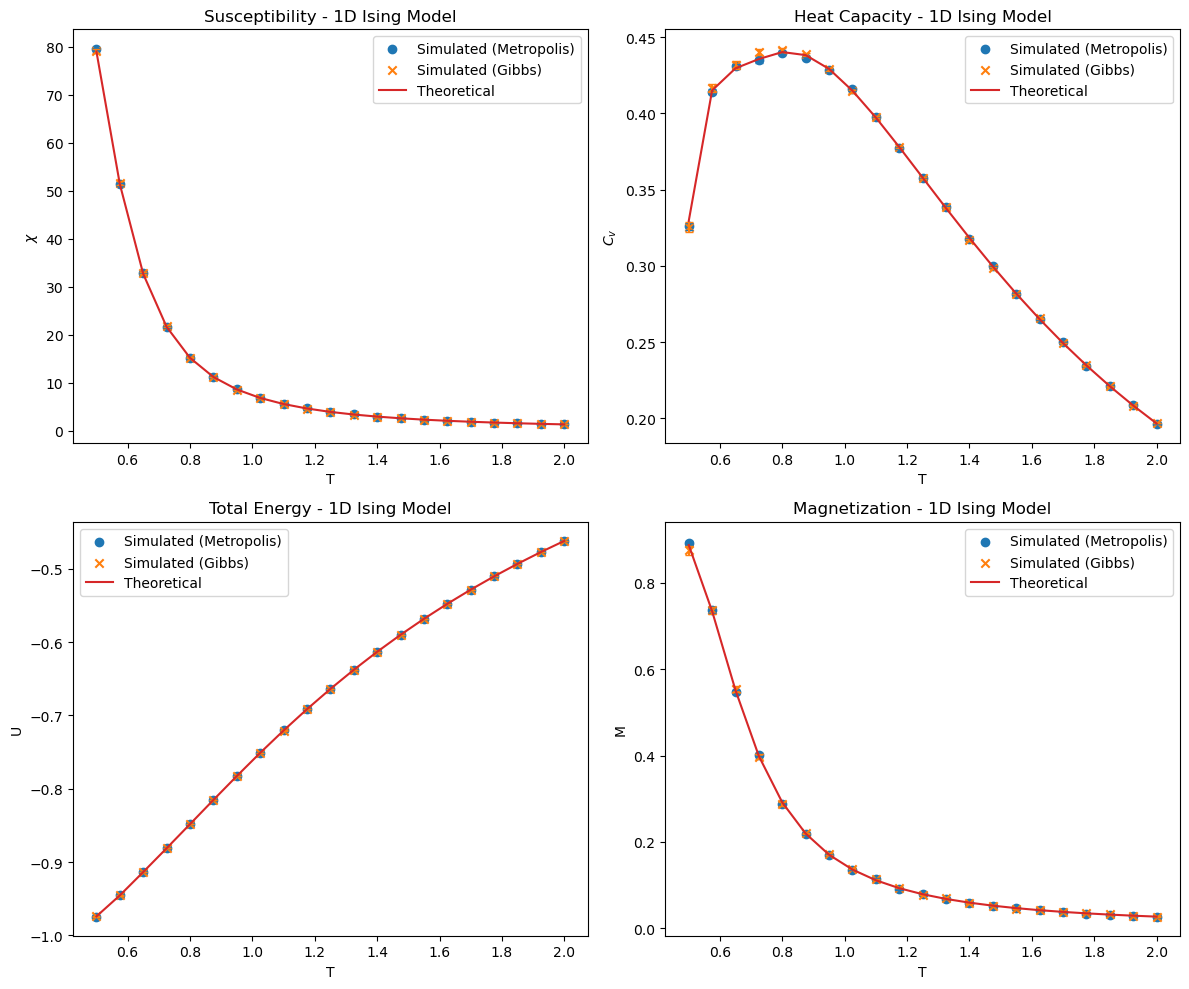

In [60]:
# Plot settings
title_dict = {
    (0, 0): (r"Susceptibility - 1D Ising Model", r"T", r"$\chi$"),
    (0, 1): (r"Heat Capacity - 1D Ising Model", r"T", r"$C_v$"),
    (1, 0): (r"Total Energy - 1D Ising Model", r"T", r"U"),
    (1, 1): (r"Magnetization - 1D Ising Model", r"T", r"M"),
}

fig, ax = plt.subplots(2, 2, figsize=(12, 10))

# Define colors and markers for consistency
colors = {
    'Metropolis': 'tab:blue',
    'Gibbs': 'tab:orange',
    'Theoretical': 'tab:red'
}
markers = {
    'Metropolis': 'o',
    'Gibbs': 'x'
}

# Susceptibility
ax[0, 0].scatter(T, chi_metropolis, label="Simulated (Metropolis)",
                 marker=markers['Metropolis'], color=colors['Metropolis'])
ax[0, 0].errorbar(T, chi_metropolis, yerr=chi_err_metropolis,
                  fmt='none', ecolor=colors['Metropolis'], capsize=3)
ax[0, 0].scatter(T, chi_gibbs, label="Simulated (Gibbs)",
                 marker=markers['Gibbs'], color=colors['Gibbs'])
ax[0, 0].errorbar(T, chi_gibbs, yerr=chi_err_gibbs,
                  fmt='none', ecolor=colors['Gibbs'], capsize=3)
ax[0, 0].plot(T, X, label="Theoretical", linestyle='-', color=colors['Theoretical'])

# Heat Capacity
ax[0, 1].scatter(T, cv_metropolis, label="Simulated (Metropolis)",
                 marker=markers['Metropolis'], color=colors['Metropolis'])
ax[0, 1].errorbar(T, cv_metropolis, yerr=cv_err_metropolis,
                  fmt='none', ecolor=colors['Metropolis'], capsize=3)
ax[0, 1].scatter(T, cv_gibbs, label="Simulated (Gibbs)",
                 marker=markers['Gibbs'], color=colors['Gibbs'])
ax[0, 1].errorbar(T, cv_gibbs, yerr=cv_err_gibbs,
                  fmt='none', ecolor=colors['Gibbs'], capsize=3)
ax[0, 1].plot(T, heat, label="Theoretical", linestyle='-', color=colors['Theoretical'])

# Total Energy
ax[1, 0].scatter(T, U_metropolis, label="Simulated (Metropolis)",
                 marker=markers['Metropolis'], color=colors['Metropolis'])
ax[1, 0].errorbar(T, U_metropolis, yerr=U_err_metropolis,
                  fmt='none', ecolor=colors['Metropolis'], capsize=3)
ax[1, 0].scatter(T, U_gibbs, label="Simulated (Gibbs)",
                 marker=markers['Gibbs'], color=colors['Gibbs'])
ax[1, 0].errorbar(T, U_gibbs, yerr=U_err_gibbs,
                  fmt='none', ecolor=colors['Gibbs'], capsize=3)
ax[1, 0].plot(T, e, label="Theoretical", linestyle='-', color=colors['Theoretical'])

# Magnetization
ax[1, 1].scatter(T, M_metropolis, label="Simulated (Metropolis)",
                 marker=markers['Metropolis'], color=colors['Metropolis'])
ax[1, 1].errorbar(T, M_metropolis, yerr=M_err_metropolis,
                  fmt='none', ecolor=colors['Metropolis'], capsize=3)
ax[1, 1].scatter(T, M_gibbs, label="Simulated (Gibbs)",
                 marker=markers['Gibbs'], color=colors['Gibbs'])
ax[1, 1].errorbar(T, M_gibbs, yerr=M_err_gibbs,
                  fmt='none', ecolor=colors['Gibbs'], capsize=3)
ax[1, 1].plot(T, M_th, label="Theoretical", linestyle='-', color=colors['Theoretical'])

# Formatting
for (i, j), (title, xlabel, ylabel) in title_dict.items():
    ax[i, j].set_title(title)
    ax[i, j].set_xlabel(xlabel)
    ax[i, j].set_ylabel(ylabel)
    ax[i, j].legend()

plt.tight_layout()
plt.show()

## Commenti

### Scopo dell'esercizio e risultati attesi
- Simulare un modello di Ising unidimensionale attraverso l'algoritmo di campionamento di Metropolis e di Gibbs.
- Calcolare l'energia interna $U(N, T)$, la capacità termica $C(N, T)$,  la suscettività $\chi(N, T)$ e la magnetizzazione $M(N, T, h = 0.02)$ in un intervallo di $T$ $[0.5, 2.0]$.
### Risultati
- Usando $N = 20$ blocchi, ciascuno da $M = 10^5$ steps e 10000 passi di equilibrazione ogni volta che cambio temperatura si ottengono dei risultati con le simulazioni Monte Carlo e con Gibbs molto aderenti con le curva teorica.
- Le incertezze sono molto piccole, segno del fatto che i diversi blocchi hanno una media molto simile e la simulazione è andata bene. 